In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [31]:
file_path = "mobile phone rating by dxo.csv"
data = pd.read_csv(file_path)

In [32]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ayadm\AppData\Local\Temp\ipykernel_18424\3438782961.py:1: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)


In [33]:
data['brand'] = data['model'].apply(lambda x: x.split()[0])

In [34]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   model    223 non-null    object 
 1   price    223 non-null    float64
 2   launch   223 non-null    object 
 3   camera   184 non-null    float64
 4   selfie   72 non-null     float64
 5   audio    93 non-null     float64
 6   display  64 non-null     float64
 7   battery  54 non-null     float64
 8   brand    223 non-null    object 
dtypes: float64(6), object(3)
memory usage: 15.8+ KB


In [35]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
             price      camera      selfie      audio    display    battery
count   223.000000  184.000000   72.000000  93.000000  64.000000  54.000000
mean    698.228700  106.445652   87.069444  65.451613  82.375000  74.351852
std     327.153319   17.605801   14.862114   8.482099  10.173885  11.093356
min      89.000000   56.000000   22.000000  41.000000  43.000000  49.000000
25%     459.500000   94.000000   80.750000  60.000000  78.750000  66.250000
50%     699.000000  108.000000   91.000000  66.000000  85.500000  74.500000
75%     899.000000  119.000000   98.000000  71.000000  89.000000  84.750000
max    1999.000000  144.000000  106.000000  81.000000  99.000000  96.000000


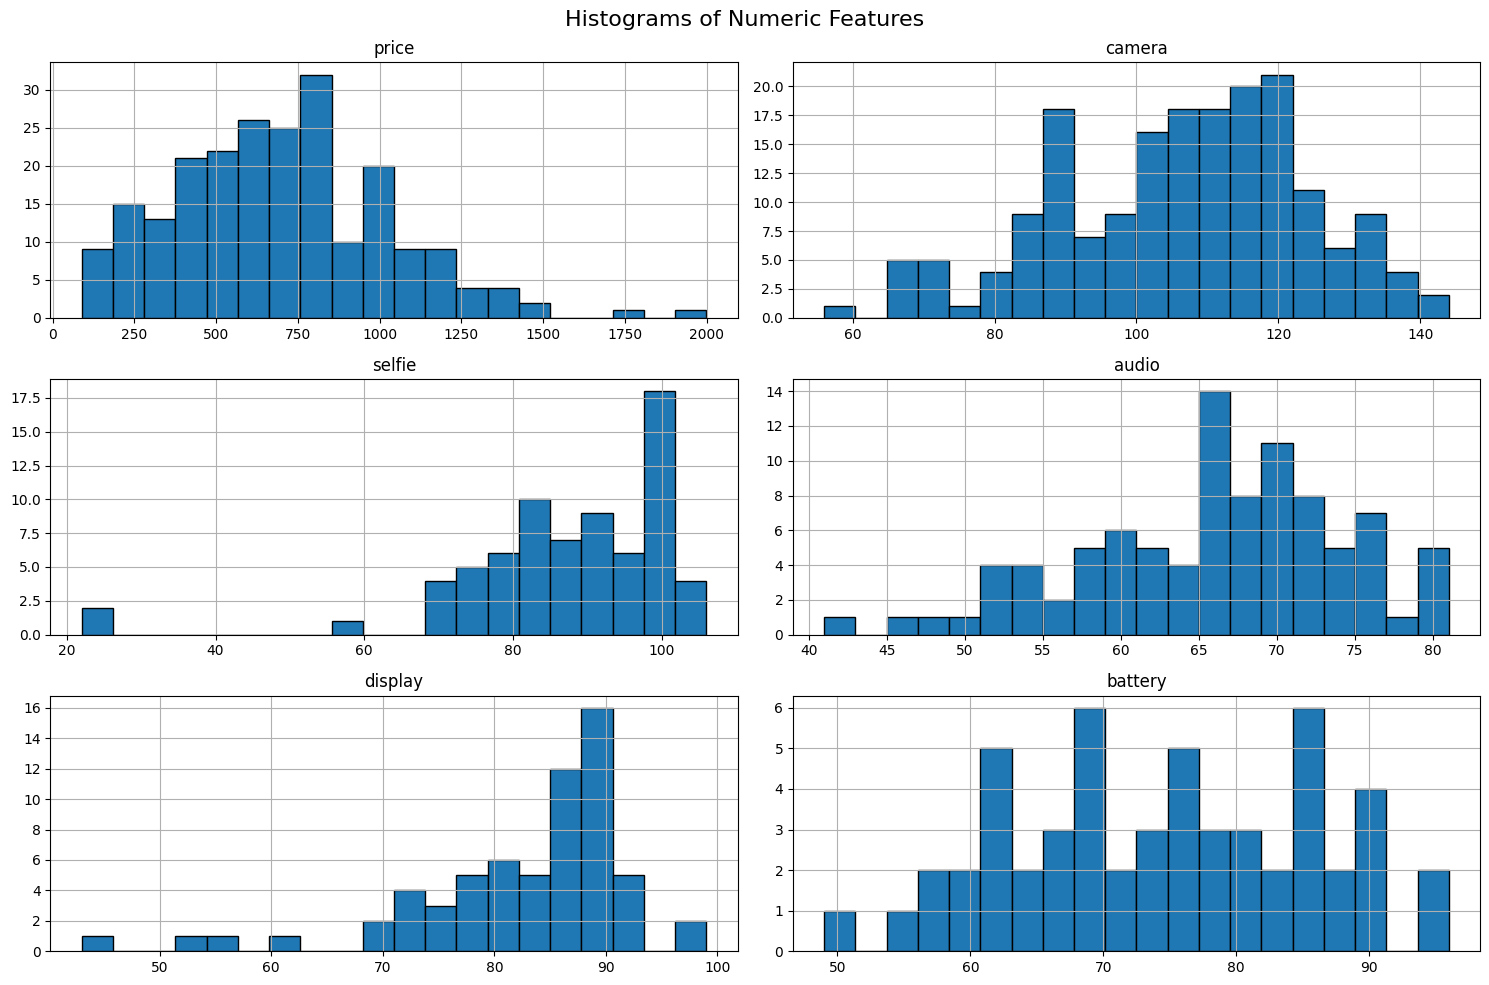

In [36]:
data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

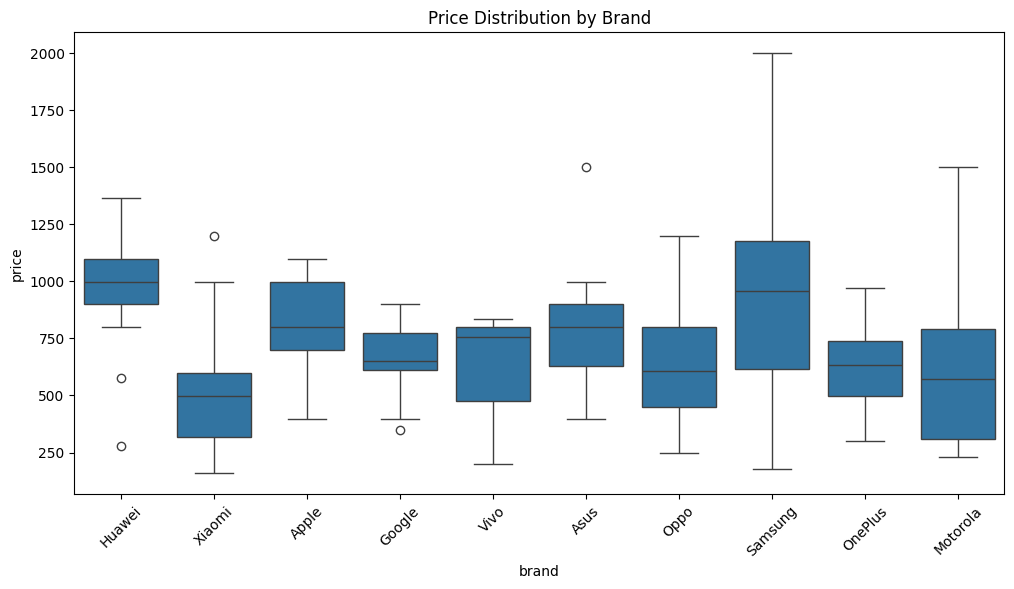

In [37]:
top_brands = data['brand'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price', data=data[data['brand'].isin(top_brands)])
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.show()

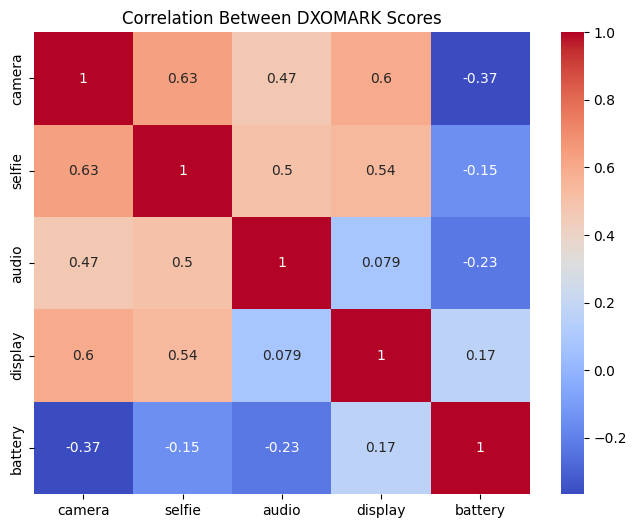

In [38]:
score_cols = ['camera', 'selfie', 'audio', 'display', 'battery']
plt.figure(figsize=(8, 6))
sns.heatmap(data[score_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between DXOMARK Scores')
plt.show()

In [39]:
brand_summary = data.groupby('brand')[score_cols + ['price']].mean().sort_values(by='camera', ascending=False)
print("\nAverage Scores by Brand:")
print(brand_summary.head(10))


Average Scores by Brand:
             camera     selfie      audio    display    battery       price
brand                                                                      
Huawei   123.181818  91.777778  63.750000  89.000000  73.000000  935.538462
Honor    120.000000  80.500000  64.333333        NaN        NaN  789.500000
TCL      117.000000        NaN        NaN  86.000000        NaN  499.000000
Vivo     116.600000  86.000000  53.600000  89.000000  77.500000  623.818182
Oppo     112.785714  76.000000  61.250000  82.250000  79.777778  625.411765
Apple    111.611111  92.923077  73.272727  90.500000  73.000000  839.000000
Asus     110.714286  99.500000  73.200000  77.666667  63.500000  813.444444
OnePlus  110.545455  87.000000  67.000000  88.500000  75.500000  624.833333
Xiaomi   109.681818  86.444444  69.000000  82.571429  74.181818  503.703704
Google   107.600000  92.333333  69.500000  83.666667  58.000000  649.000000


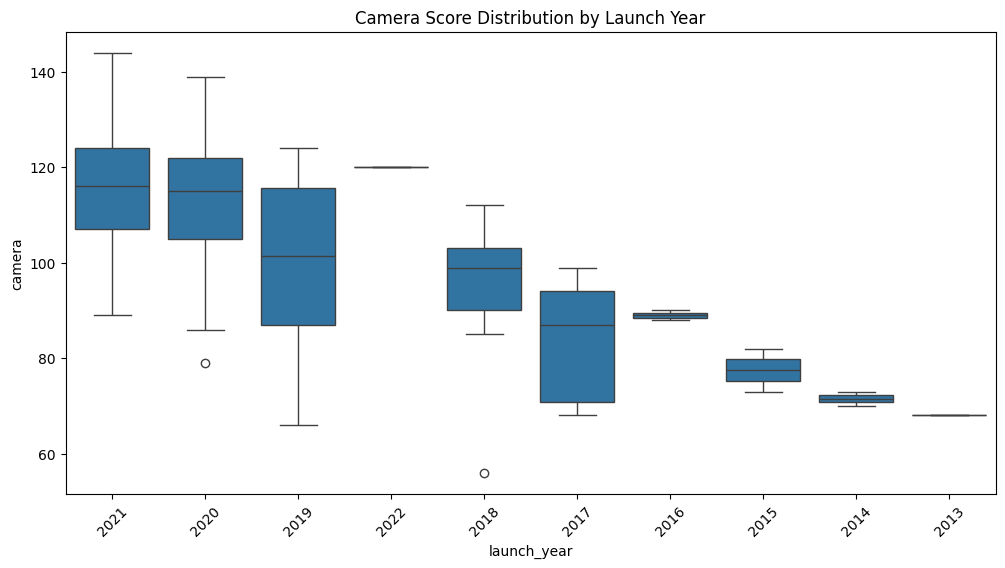

In [40]:
data['launch_year'] = data['launch'].str.extract(r'(\d{4})')
plt.figure(figsize=(12, 6))
sns.boxplot(x='launch_year', y='camera', data=data)
plt.title('Camera Score Distribution by Launch Year')
plt.xticks(rotation=45)
plt.show()

In [ ]:
x = st.skewnorm.rvs(10, size=1000)

In [44]:
x[0:20]

array([1.32343998, 1.0760439 , 0.28513248, 0.14664248, 2.08773621,
       0.21842431, 0.66379098, 0.71554455, 1.26123347, 1.35074734,
       1.15064352, 0.19759259, 1.70708583, 0.91623859, 1.72000364,
       0.63387865, 1.64394195, 0.8124438 , 1.0240038 , 1.95187705])

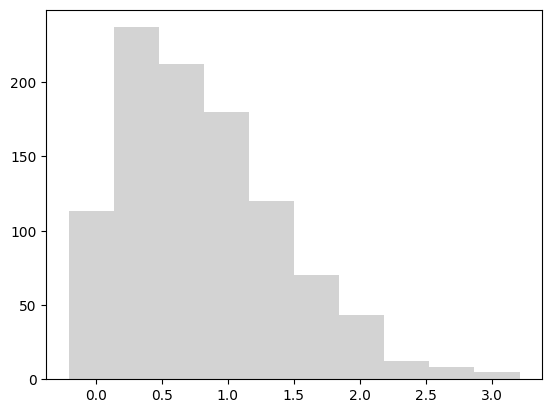

In [45]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

In [46]:
xbar = x.mean()
xbar

np.float64(0.8144136632501957)

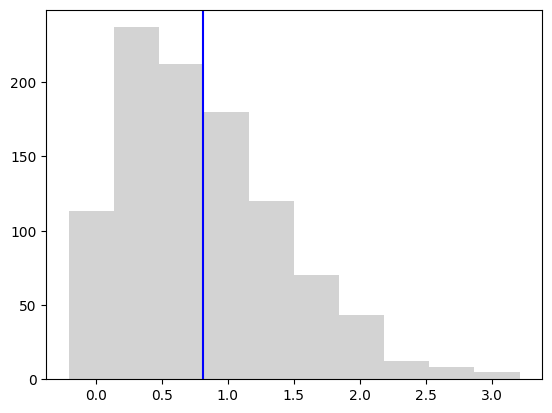

In [47]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='blue')
_ = plt.hist(x, color = 'lightgray')

In [48]:
np.median(x) 

np.float64(0.7231329788980903)

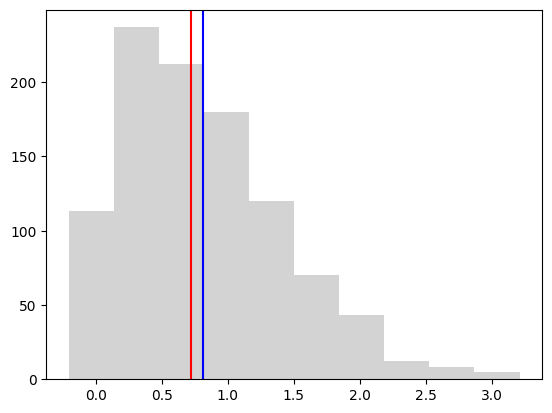

In [50]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='blue')
plt.axvline(x = np.median(x), color='red')
_ = plt.hist(x, color = 'lightgray')

In [51]:
x.var()

np.float64(0.3685544897699084)

In [52]:
x.var()**(1/2)

np.float64(0.607086888155154)

In [53]:
sigma = x.std()
sigma

np.float64(0.607086888155154)

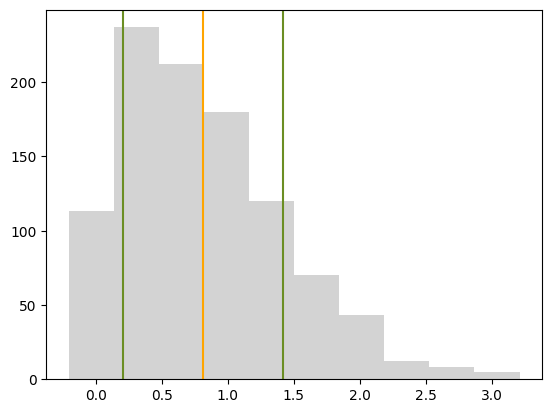

In [54]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

In [55]:
sigma/(x.size)**(1/2)

np.float64(0.01919777304194183)

In [56]:
st.sem(x) 

np.float64(0.019207379133632248)

In [57]:
st.sem(x, ddof=0)

np.float64(0.01919777304194183)

In [58]:
x = np.random.normal(size=100000)

In [59]:
sns.set_style('ticks')

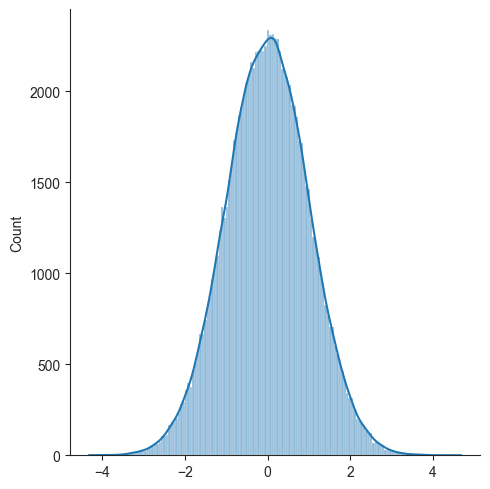

In [60]:
_ = sns.displot(x, kde=True)

In [61]:
x.mean()

np.float64(-0.0026523188869980994)

In [62]:
x.mean()

np.float64(-0.0026523188869980994)

In [63]:
x_sample = np.random.choice(x, size=100, replace=False)
x_sample

array([ 1.76300173e-01, -2.55143618e-02,  5.33688117e-01,  1.76395351e+00,
        7.96116265e-01, -6.82523370e-01,  1.61009415e-01, -1.86515284e+00,
        8.89823637e-01,  6.50291190e-01, -7.55849705e-01,  7.06427740e-01,
       -9.59316340e-01,  4.01615875e-02,  4.22447784e-01, -3.54198198e-01,
        5.31554576e-01,  1.09641128e+00,  5.63467462e-01, -2.59639469e+00,
       -8.88823605e-02, -7.09616335e-01,  1.43424202e+00, -1.14970312e+00,
        5.42545616e-01,  3.87461120e-01,  5.61984923e-01, -2.29019128e+00,
        1.68786376e+00, -1.73228019e+00, -1.16842916e+00, -1.13400518e+00,
        2.60089432e-01, -6.03981923e-01, -2.17354496e-01, -2.05503525e-01,
       -3.67230751e-01,  1.33058903e+00, -6.44042408e-01,  1.19511627e+00,
       -1.73130477e+00, -8.95736760e-01,  1.24443315e+00,  1.76627482e+00,
       -2.04633100e+00,  4.68357630e-01, -6.67300326e-01, -1.15049253e+00,
       -2.30007898e+00,  8.40312397e-01,  1.09987369e+00, -5.68790148e-01,
       -1.65097010e+00, -

In [64]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 0.24632282, -1.75052337, -0.86227582, -0.36716922,  0.18817166,
       -0.78556126,  0.59175608, -0.20988193, -1.67131775, -0.04843961])

In [65]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [66]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [67]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [68]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

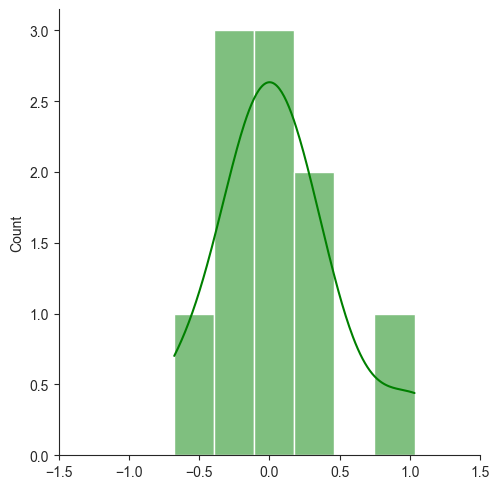

In [69]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

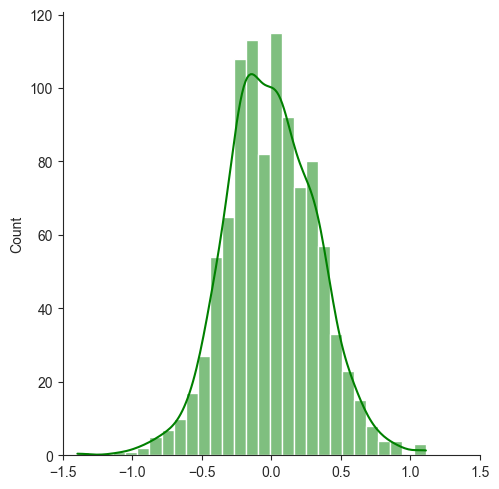

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

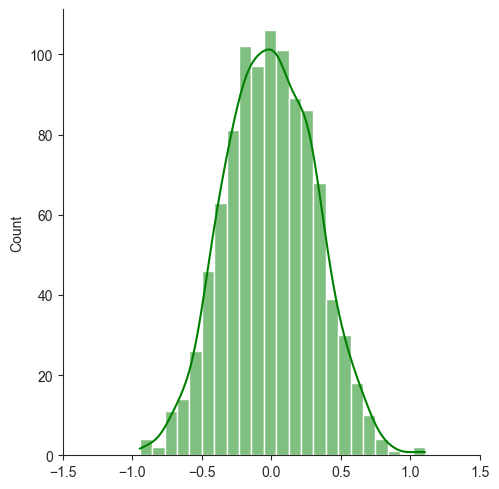

In [71]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

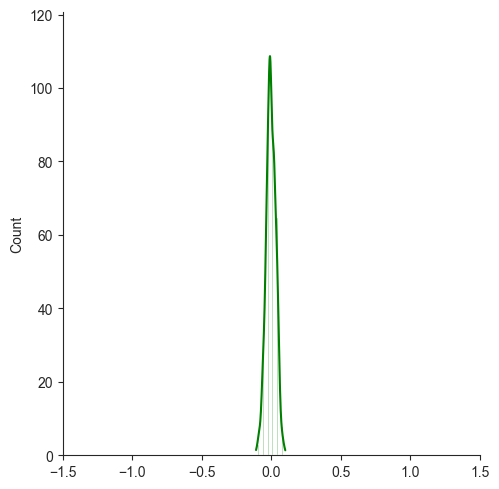

In [72]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

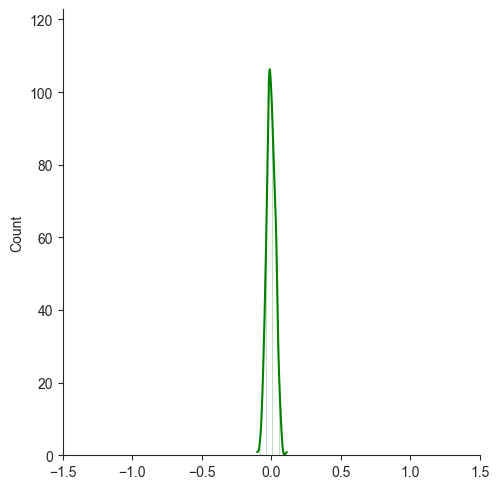

In [73]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

In [74]:
s = st.skewnorm.rvs(10, size=10000)

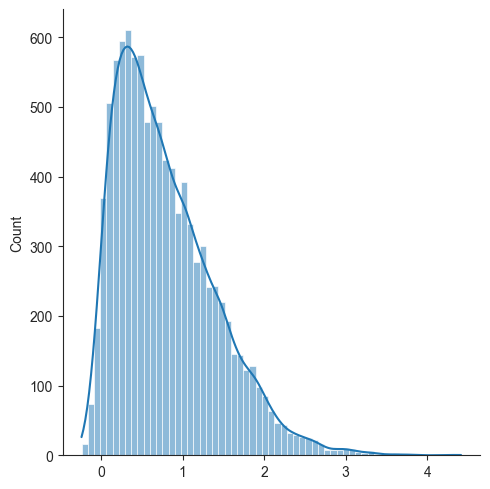

In [75]:
_ = sns.displot(s, kde=True)

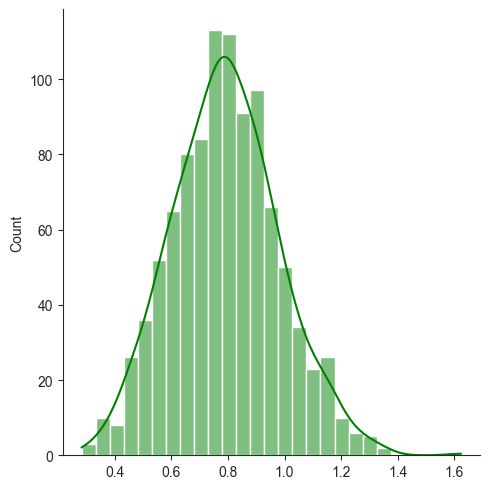

In [76]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

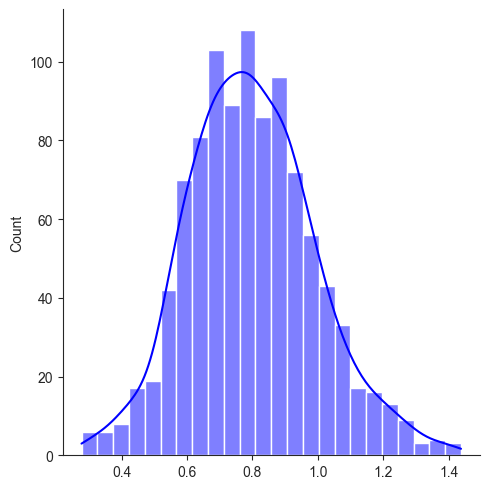

In [79]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='blue', kde=True)

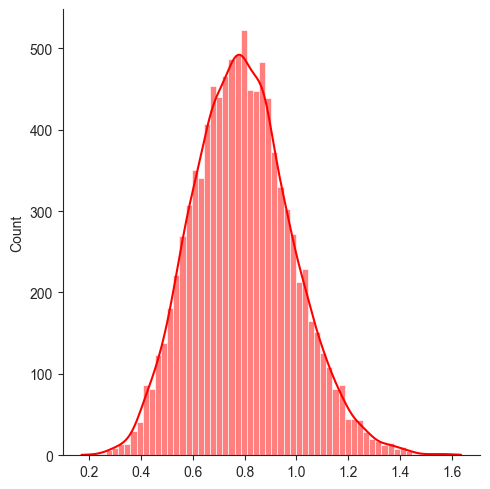

In [78]:
_ = sns.displot(sample_mean_calculator(s, 10-00, 10000), color='red', kde=True)

In [80]:
m = np.concatenate((np.random.normal(size=20000), np.random.normal(loc = 4.0, size=5000)))

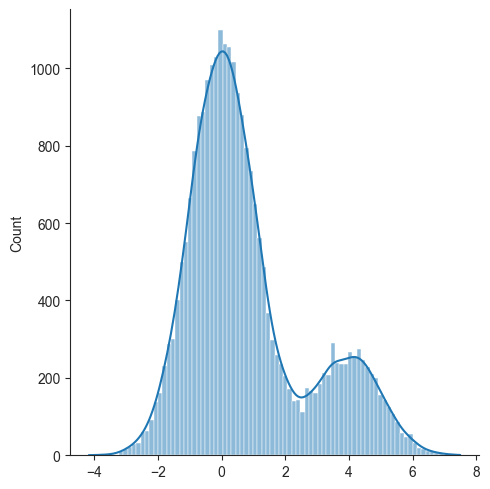

In [81]:
_ = sns.displot(m, kde=True)

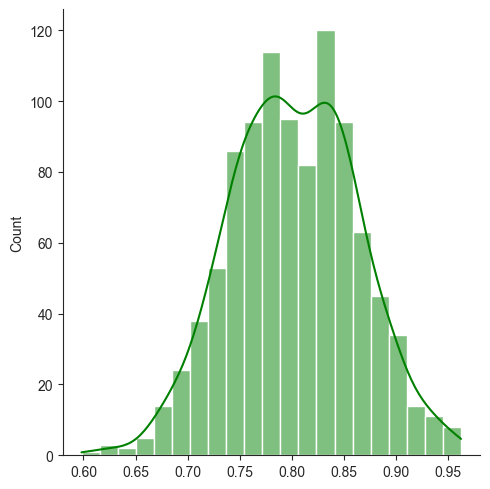

In [83]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

In [84]:
u = np.random.uniform(size=10000)

In [85]:
u = np.random.uniform(size=10000)

In [96]:
p_below = st.norm.cdf(-2.5)
p_below

np.float64(0.006209665325776132)

In [97]:
p_below*10000

np.float64(62.096653257761325)

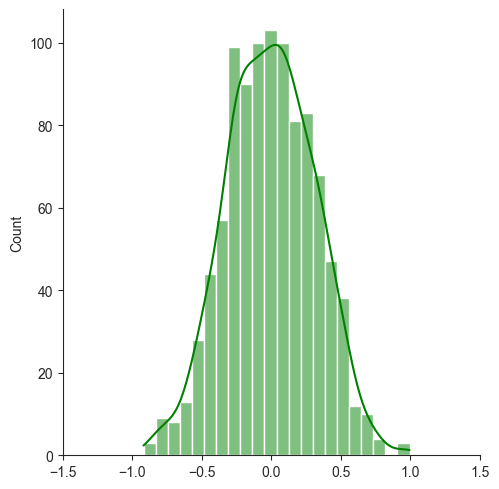

In [104]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

In [105]:
st.norm.cdf(2.5)

np.float64(0.9937903346742238)

In [106]:
p_above = 1-st.norm.cdf(2.5)
p_above

np.float64(0.006209665325776159)

In [107]:
p_above*10000

np.float64(62.09665325776159)

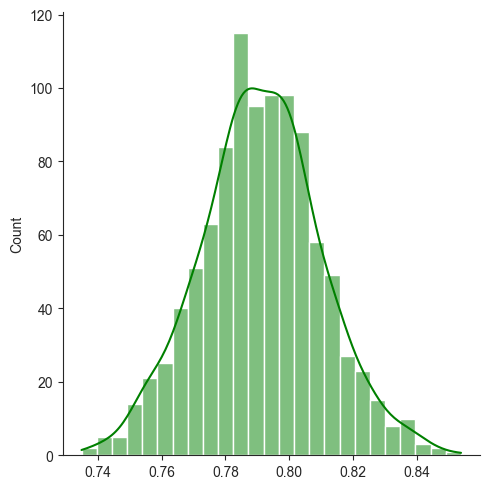

In [109]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

In [110]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

In [41]:
df = pd.read_csv(file_path)


df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


df_clean = df.dropna(subset=['camera', 'selfie', 'audio', 'display', 'battery', 'price'])


df_clean.head()

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ayadm\AppData\Local\Temp\ipykernel_18424\1689885377.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


,model,price,launch,camera,selfie,audio,display,battery
1,Xiaomi Mi 11 Ultra,1200.0,Mar 2021,143.0,94.0,71.0,87.0,69.0
3,Apple iPhone 13 Pro Max,1099.0,Sep 2021,137.0,99.0,75.0,99.0,89.0
4,Apple iPhone 13 Pro,999.0,Sep 2021,137.0,99.0,75.0,98.0,76.0
15,Apple iPhone 13,799.0,Sep 2021,130.0,99.0,75.0,93.0,74.0
16,Apple iPhone 13 mini,699.0,Sep 2021,130.0,99.0,75.0,90.0,62.0


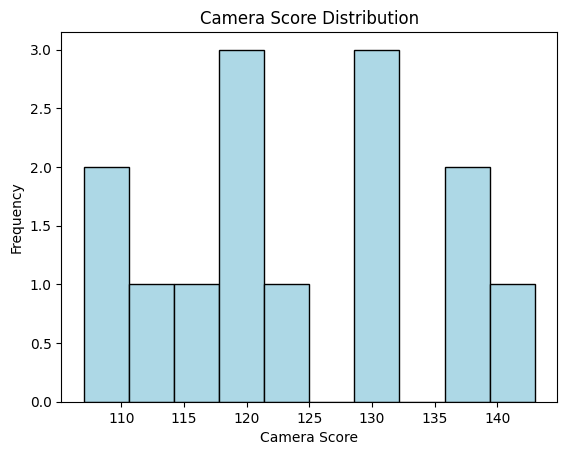

In [42]:
x = df_clean['camera']

# Histogram
plt.hist(x, bins=10, color='lightblue', edgecolor='black')
plt.title("Camera Score Distribution")
plt.xlabel("Camera Score")
plt.ylabel("Frequency")
plt.show()

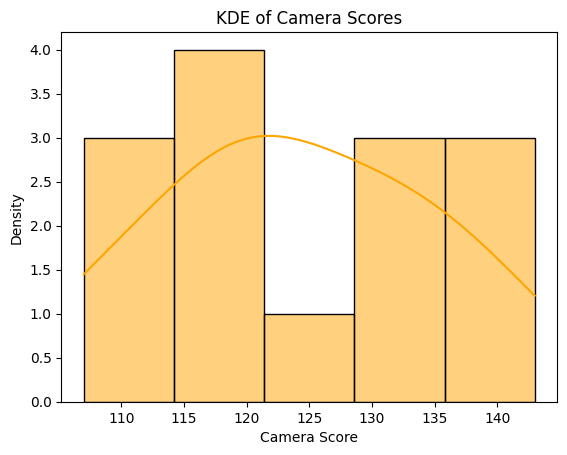

In [22]:
sns.histplot(x, kde=True, color='orange')
plt.title("KDE of Camera Scores")
plt.xlabel("Camera Score")
plt.ylabel("Density")
plt.show()

In [26]:
print(f"Skewness: {st.skew(x):.2f}")
print(f"Kurtosis: {st.kurtosis(x):.2f}")

Skewness: 0.07
Kurtosis: -0.92


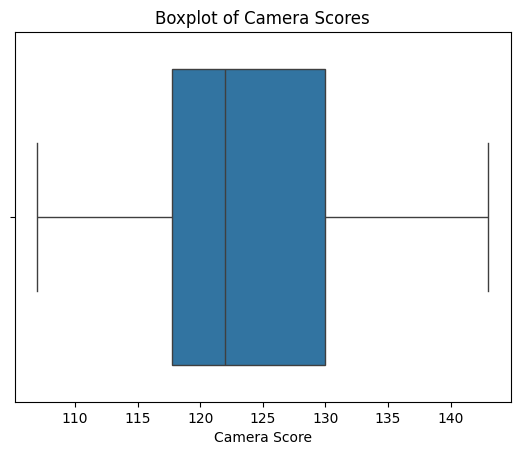

In [27]:
sns.boxplot(x=x)
plt.title("Boxplot of Camera Scores")
plt.xlabel("Camera Score")
plt.show()

In [28]:
x = df_clean['battery'] 

In [29]:
x = df_clean['camera']